## Final Project Submission

* Student name: Solphine Joseph, Grace Rotich, Mathew Kiprotich, Hilary Simiyu, Clyde Ochieng, Derrick Kiptoo. 
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita 
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## Overview

A real estate agency in Kingsway seeks to determine what are the contributing factors that affect the price of houses to make improvements where necessary. They want to employ an analytical approach rather than sentimental before arriving at a decision. Multilinear regression has been used for this project to understand how various features affect their pricing to better their services.

## Business Problem

In the face of market fluctuations and heightened competition within the real estate sector, our agency is grappling with pricing volatility, which poses significant challenges for our agents in devising effective business strategies. We seek strategic guidance to optimize our purchasing and selling endeavors, prioritizing informed decision-making to identify key areas of focus that promise maximum returns on investment.

### Objectives
* To determine the key factors influencing house prices.
* To develop multilinear regression models to predict house prices based on relevant features.
* To use insights from the regression analysis to optimize pricing strategies for both purchasing and selling properties.


### Hypothesis
* Null Hypothesis - There is no relationship between our independent variables and our dependent variable 

* Alternative Hypothesis - There is a relationship between our independent variables and our dependent variable

### Data Understanding:

In this project, we utilized the King County House Sales dataset, which serves as the foundational dataset for our analysis. It was sourced Kaggle.The dataset encompasses comprehensive information regarding house sales within King County, Washington, USA. It comprises a diverse array of features, including the number of bedrooms, bathrooms, square footage, as well as geographical and pricing details of the properties sold. This dataset is frequently employed in data science and machine learning endeavors, particularly for predictive modeling tasks such as regression analysis aimed at forecasting house prices based on the provided features.

##### King County Housing Data Columns 

The column names contained in column_names.md are:
* `id`: A unique identifier for each house sale.
* `date`: The date when the house was sold.
* `price`: The sale price of the house, serving as the target variable for predictive modeling.
* `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`: Numerical features representing the number of bedrooms and bathrooms, as well as the living area and lot area of the house, respectively.
* `floors`: The number of floors in the house.
* `waterfront`, `view`, `condition`, `grade`: Categorical features describing aspects such as waterfront availability, property view, condition, and overall grade assigned to the housing unit.
* `yr_built`, `yr_renovated`: Year of construction and renovation of the house.
* `zipcode`, `lat`, `long`: Geographical features including ZIP code, latitude, and longitude coordinates.
* `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15`: Additional numerical features providing details about the house's above-ground and basement square footage, as well as living area and lot area of the nearest 15 neighboring houses.

## Data Loading

#### Import Necessary Libraries



In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm


In [29]:
# Creating a function that loads data and return it in a dataframe
def load_data(file_path):
    house_data = pd.read_csv(file_path)

    #shape
    shape = house_data.shape
    print(f"The dataset contains {shape[0]} houses with {shape[1]} features")
    print()
    
    #Data Types
    data_types = house_data.dtypes
    print("Columns and their data types:")
    for column, dtype in data_types.items():
        print(f"{column}: {dtype}")
    print()

    return house_data


In [3]:
load_data('data/kc_house_data.csv')  # Assuming 'data' folder is in the same directory




The dataset contains 21597 houses with 21 features

Columns and their data types:
id: int64
date: object
price: float64
bedrooms: int64
bathrooms: float64
sqft_living: int64
sqft_lot: int64
floors: float64
waterfront: object
view: object
condition: object
grade: object
sqft_above: int64
sqft_basement: object
yr_built: int64
yr_renovated: float64
zipcode: int64
lat: float64
long: float64
sqft_living15: int64
sqft_lot15: int64



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21 columns, each representing a distinct feature, and 21,597 rows, with each row corresponding to a specific house sale entry.

The dataset contains a mix of data types, including integers (int64), floating-point numbers (float64), and objects (strings).  For instance, numerical features such as bedrooms, bathrooms, and sqft_living are represented as integers or floating-point numbers to facilitate mathematical computations, while categorical features like waterfront and view are stored as objects to accommodate text-based categories.

In [4]:
kings_data = load_data('data/kc_house_data.csv')

The dataset contains 21597 houses with 21 features

Columns and their data types:
id: int64
date: object
price: float64
bedrooms: int64
bathrooms: float64
sqft_living: int64
sqft_lot: int64
floors: float64
waterfront: object
view: object
condition: object
grade: object
sqft_above: int64
sqft_basement: object
yr_built: int64
yr_renovated: float64
zipcode: int64
lat: float64
long: float64
sqft_living15: int64
sqft_lot15: int64



In [5]:
#create a function that takes in a column and returns the column statistics as a dictionary
def descriptive_analytics(column):
    stats_dict = column.describe().to_dict()
    
    print("Descriptive Statistics for Column '{}':".format(column.name))
    print("The count of the column is:", stats_dict['count'])
    print("The mean of the column is:", stats_dict['mean'])
    print("The standard deviation of the column is:", stats_dict['std'])
    print("The minimum value of the column is:", stats_dict['min'])
    print("The 25th percentile of the column is:", stats_dict['25%'])
    print("The median of the column is:", stats_dict['50%'])
    print("The 75th percentile of the column is:", stats_dict['75%'])
    print("The maximum value of the column is:", stats_dict['max'])

In [6]:
descriptive_analytics(kings_data['price'])

Descriptive Statistics for Column 'price':
The count of the column is: 21597.0
The mean of the column is: 540296.5735055795
The standard deviation of the column is: 367368.1401013945
The minimum value of the column is: 78000.0
The 25th percentile of the column is: 322000.0
The median of the column is: 450000.0
The 75th percentile of the column is: 645000.0
The maximum value of the column is: 7700000.0


We can see that the maximum price of a house is 7700000 dollars  and the minimum price is 78000 dollars

There are 21597 prices regarding to the houses in the dataset

Average price of a house is 540296.57 dollars

## Data Preperation



In [7]:
kings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
def identify_issues(dataset):
    # Identify missing values as a percentage of the whole dataset
    missing_values = (dataset.isnull().sum())/len(dataset) * 100

    # Identify duplicates
    duplicates = dataset.duplicated().sum()
    
    #return a dictionary 
    return {'duplicates': duplicates,
            'missing values': missing_values.round(2)}   


In [9]:
identify_issues(kings_data)

{'duplicates': 0,
 'missing values': id                0.00
 date              0.00
 price             0.00
 bedrooms          0.00
 bathrooms         0.00
 sqft_living       0.00
 sqft_lot          0.00
 floors            0.00
 waterfront       11.00
 view              0.29
 condition         0.00
 grade             0.00
 sqft_above        0.00
 sqft_basement     0.00
 yr_built          0.00
 yr_renovated     17.79
 zipcode           0.00
 lat               0.00
 long              0.00
 sqft_living15     0.00
 sqft_lot15        0.00
 dtype: float64}

The examination indicates that there are no duplicate entries within the dataset, ensuring the integrity of the records. However, attention is warranted to address missing values present in certain columns. Specifically, the 'waterfront' feature exhibits 11% of null values, representing a negligible portion of the dataset. Similarly, the 'yr_renovated' feature shows a relatively higher percentage of missing values, accounting for approximately 17.79% of the dataset

##### Before making changes make a copy instead of overwriting data

In [10]:
house_data_clean = kings_data.copy()

In [11]:
# Changing the date to date time
house_data_clean['date'] = pd.to_datetime(house_data_clean['date'])

# Extracting only the year from the column Date
house_data_clean.date = house_data_clean['date'].dt.year

# Changing the dates for the year built 
house_data_clean['yr_built'] = pd.to_datetime(house_data_clean['yr_built'],format='%Y').dt.year


The above code converts the 'date' column data to only contain the year the house was sold, for the purpose of analysis we will use only the year since the changes month by month will be minor.

#### Dealing with the missing values

In [12]:
def missing_values(dataset):
    # drop the rows from views
    dataset.dropna(subset=['view'],inplace=True)

    # Filling the NaN values for waterfront with NO
    dataset.waterfront.fillna('NO',inplace=True)
    
    # Dropping the yr_renovated column 
    dataset.drop('yr_renovated',axis=1,inplace=True)

In [13]:
missing_values(house_data_clean)

'yr_renovated' has the highest percentage of NaN values 17%. This will be dropped since it will not be used within our model inline with the business problem.

'Waterfront' feature has 11% null values, this was filled with NO on the assumption that these cells were not filled since they lacked waterfronts

For the 'View' column, the null values were dropped by row since the overall percentage impact would be minute

In [14]:
identify_issues(house_data_clean)

{'duplicates': 2,
 'missing values': id               0.0
 date             0.0
 price            0.0
 bedrooms         0.0
 bathrooms        0.0
 sqft_living      0.0
 sqft_lot         0.0
 floors           0.0
 waterfront       0.0
 view             0.0
 condition        0.0
 grade            0.0
 sqft_above       0.0
 sqft_basement    0.0
 yr_built         0.0
 zipcode          0.0
 lat              0.0
 long             0.0
 sqft_living15    0.0
 sqft_lot15       0.0
 dtype: float64}

In [15]:
house_data_clean[house_data_clean.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3947,1825069031,2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,Good,8 Good,2060,350.0,1936,98074,47.6499,-122.088,2520,14789
20038,8648900110,2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,Average,8 Good,1940,0.0,2009,98027,47.5644,-122.093,1880,3078


# Exploratory Data Analysis

### King County Housing Analysis and Visualization

In the exploratory phase of data analysis, histograms and box plots play pivotal roles in understanding the distribution patterns of variables. Histograms provide a visual representation of the frequency and spread of values within each variable, offering valuable insights into the data's central tendencies and variability. Meanwhile, box plots offer a concise summary of the data's distribution, including measures of central tendency, variability, and the presence of potential outliers. Together, these visualizations provide a comprehensive overview of the dataset's characteristics, laying the groundwork for deeper analysis and informing subsequent modeling and decision-making processes.

### Data Analysis

In [16]:
def calculate_statistics(df, column_name):
    #calculate mean
    mean_value = df[column_name].mean()
    #calculate mode, and pick the first if multiple mode exist
    mode_value = df[column_name].mode()[0]
    #calculating median
    median_value = house_data_clean[column_name].median()
    #calculating std
    std_value = df[column_name].std()

    # Create a dictionary to store the statistics
    statistics = {
        "Mean": mean_value,
        "Mode": mode_value,
        "Median": median_value,
        "Standard Deviation": std_value
    }
    return statistics

In [17]:
calculate_statistics(house_data_clean, "price")

{'Mean': 540057.663833937,
 'Mode': 350000.0,
 'Median': 450000.0,
 'Standard Deviation': 366059.58123129635}

This code snippet categorizes columns with numeric values from the DataFrame house_data_clean and prints them out

In [18]:
# Initialize lists for numeric columns
numeric_columns = []


# Iterate through columns and categorize them based on data type
for column in house_data_clean.columns:
        if house_data_clean[column].dtype in ['int64', 'float64']:  # Check if the column data type is numeric
            numeric_columns.append(column)
    
            
print ("These are columns with numerical values:\n",numeric_columns)

These are columns with numerical values:
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


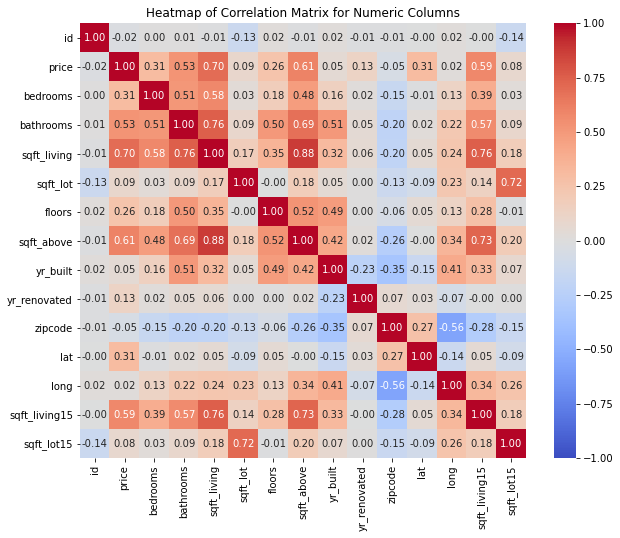

In [30]:
#This code snippet calculates the correlation matrix for numeric columns in the kings_data DataFrame and visualizes it using a heatmap.
numeric_columns = kings_data.select_dtypes(include=['int64', 'float64','object'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
    
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix for Numeric Columns')
plt.show()

Perfect positive correlation (1): Variables increase together perfectly.
High positive correlation (0.7 to 1): Variables mostly move in the same direction strongly.
Moderate positive correlation (0.3 to 0.7): Variables tend to move together moderately.
Weak positive correlation (0 to 0.3): Variables show a weak, inconsistent relationship.
No correlation (0): Variables are independent of each other.
Weak negative correlation (-0.3 to 0): Weak, inconsistent negative relationship.
Moderate negative correlation (-0.7 to -0.3): Moderate negative relationship.
High negative correlation (-1 to -0.7): Variables move strongly in opposite directions.
Perfect negative correlation (-1): Variables decrease together perfectly.

In [20]:
house_data_clean.drop(columns=['date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15', 'yr_built', 'lat'], inplace=True)

#### Analysis for categorical columns

This code snippet visualizes the relationship between the 'waterfront' feature and the average sale price. A bar plot is used to show the average price for properties with and without waterfront. 

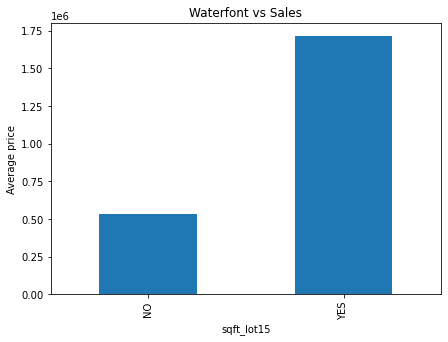

In [21]:
Categorical = ['waterfront', 'condition', 'grade'] 

# How waterfront relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
kings_data.groupby('waterfront')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Waterfont vs Sales')

# display the plot
plt.show()

The plot above clearly shows that houses with waterfronts are the most popular and sells the most

This code snippet visualizes the relationship between the 'condition' feature and the average sale price. A bar plot is used to show the average price for properties with different conditions. 

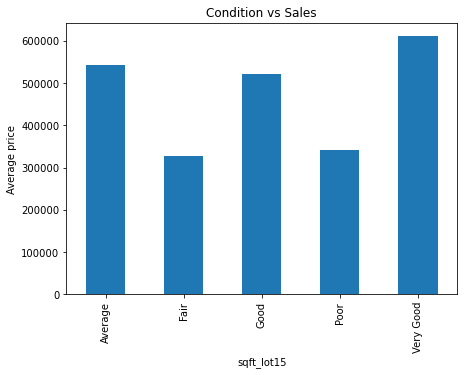

In [ ]:
# How condition relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
kings_data.groupby('condition')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Condition vs Sales')

# display the plot
plt.show()

The houses that are in good cnditions are the most popular

This code snippet visualizes the relationship between the 'grade' feature and the average sale price. A bar plot is used to show the average price for properties with different grades. 

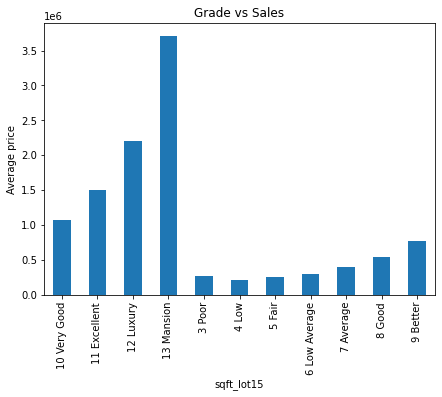

In [23]:
# How grade relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
kings_data.groupby('grade')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Grade vs Sales')

# display the plot
plt.show()

compairing mansions with the others u can tell its the highest selling 

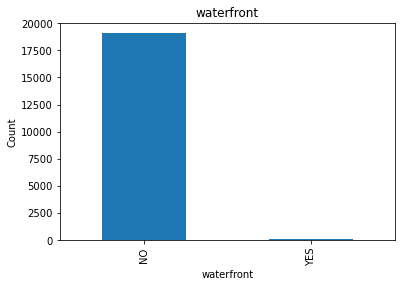

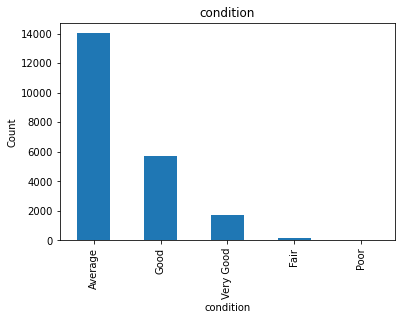

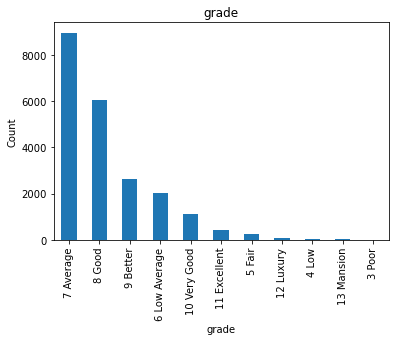

In [24]:
#This code snippet iterates through the categorical columns specified in the list `Categorical` and creates bar charts to visualize the count of each category
for column in Categorical:
    plt.figure()
    kings_data[column].value_counts().plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

In [25]:
#This function creates subplots of boxplots for each numeric column in the DataFrame, allowing for visualization of the data distribution and identification of outliers. Adjust the parameters and example usage according to your DataFrame and preferences.

def check_for_outliers_and_plot_boxplot(df, numeric_columns_list, figsize=(12, 12)):
    
    # Calculate number of subplots
    num_plots = len(numeric_columns)
    num_cols = 2  # Number of columns in each row of subplots
    num_rows = (num_plots + 1) // num_cols
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()


    # Plot boxplots for each column
    for i, column in enumerate(numeric_columns):
      sns.boxplot(x=df[column], ax=axes[i])
      axes[i].set_title(f'Boxplot of {column}')
      axes[i].set_xlabel(column)
      
      
    

From the illustration you can see the data set has outliers 

This function removes outliers from the specified column(s) in the DataFrame based on Z-scores, with an option to set a custom threshold. .

In [32]:
def remove_outliers_by_zscore(df, col, threshold=3):
    
    # Iterate over each specified column
    for column in col:
        # Calculate Z-scores for the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        # Filter rows where Z-score exceeds the threshold
        df_cleaned = df[(z_scores.abs() < threshold)]
    
    return df_cleaned

This will return a DataFrame with outliers removed from the specified numeric columns based on their Z-scores, using a threshold of 3.

c:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


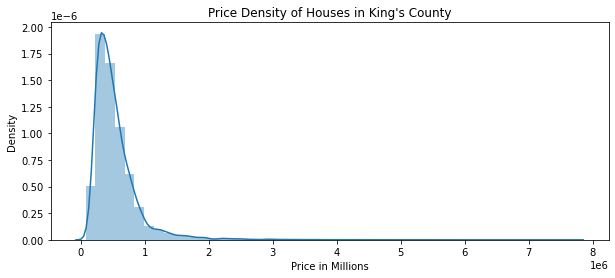

In [33]:
# Plotting a histogram with kernel density estimate (KDE) of the "price" variable
plt.figure(figsize=(10,4))
price_dist = sns.distplot(kings_data["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.savefig('Visualization2')  # Save the plot as an image file

The observation reveals that the distribution of house is right-skewed.we look at house prices, we notice that most houses are not very expensive, but there are a few that are very pricey.

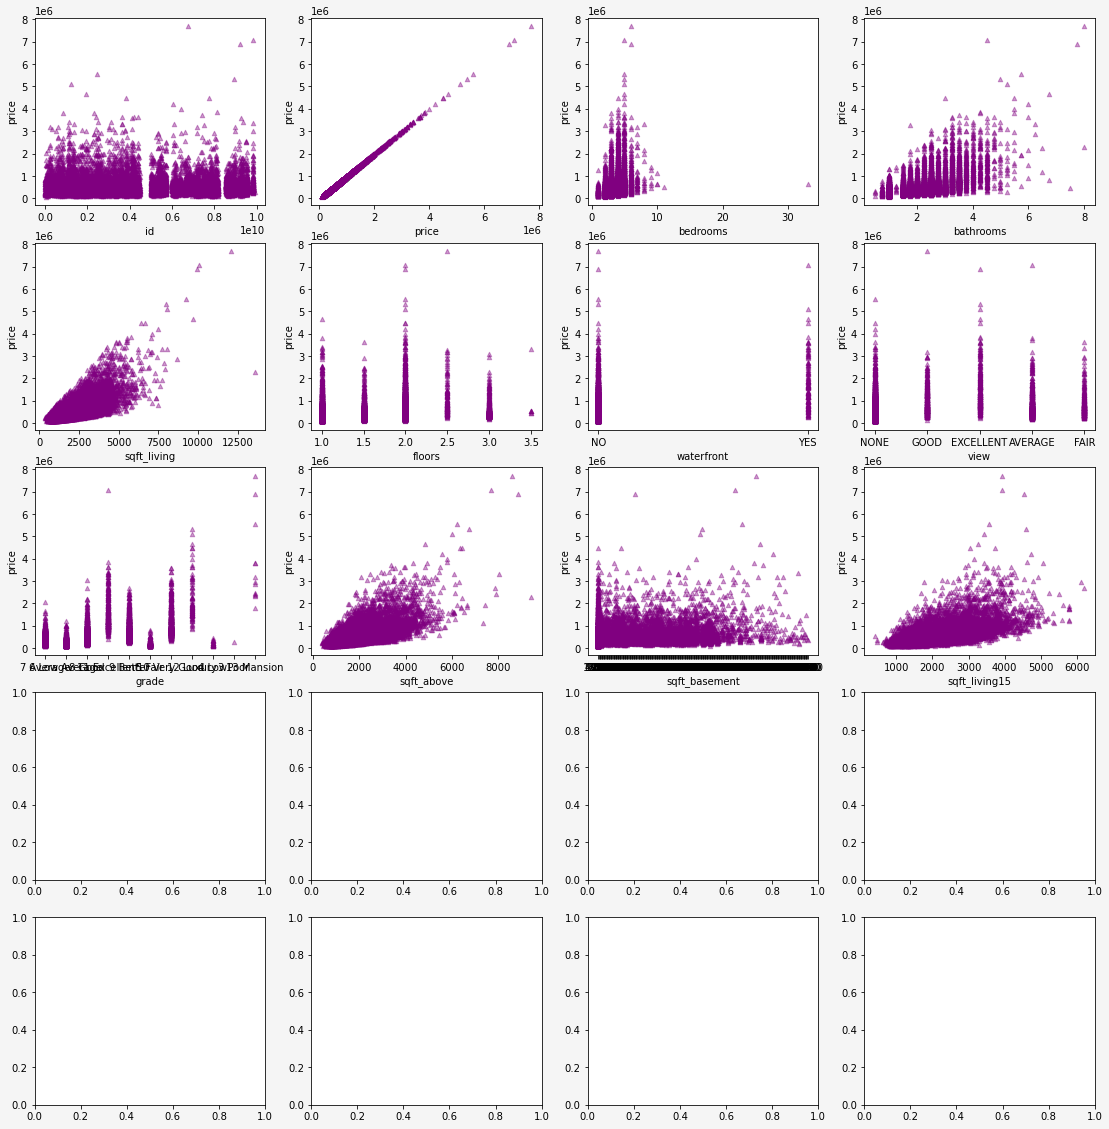

In [ ]:
#This code snippet creates a scatter plot matrix for the house data, with each numeric variable plotted against the 'price'.
# creating a list of all column names
plot_list = list(house_data_clean.columns)
len(plot_list)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(19,20))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list[0:19]):
    fig.patch.set_facecolor('whitesmoke')
    house_data_clean.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.4, color='Purple', marker='^')
    
plt.show() # add this to display the plot

## Simple Linear Model

From our EDA we can see that 'sqft_living' has the highest correlation with price, thus we'll use this as the independent variable for our analysis

In [ ]:
# Create variables for our independent and dependent features
X = house_data_clean['sqft_living']
y = house_data_clean['price']

In [ ]:
#create a function to create regression models
def regression(X_value, y_value):
    # create the model
    model = sm.OLS(y_value, sm.add_constant(X_value))
    
    #Fit the model
    results = model.fit()

    return results

In [ ]:
#call the simple_regression function and store output in results variable
simple_model_results = regression(X, y)

In [ ]:
#create a function for analysing regression results
def regression_analysis(regression_results):
    #Models P_Value
    results_pvalue = regression_results.f_pvalue

    #Model Rsquared
    r_squared = regression_results.rsquared

    #Parameters
    coeffecients = regression_results.params

    return {'Model R-Squared': r_squared,
            'Model P_value': results_pvalue,
            'Coeffecients': coeffecients, 
           }
    

In [ ]:
#calling the simple regression analysis function to get summary
regression_analysis(simple_model_results)

{'Model R-Squared': 0.4922247077876325,
 'Model P_value': 0.0,
 'Coeffecients': const         -42152.946806
 sqft_living      279.932115
 dtype: float64}

From the results above we get that:
Our model is statistically significant, with a p-value well below the standard alpha of 0.05

Our model explains about 49.2% of the variance in home price, the dependent variable

For a house with 0 squarefoot of living area, our model would predict a home price of about -42152.94 dollars. 

An increase of 1 square foot in living area  is associated with an increase of about 279.93 dollars in house price.

#### Assumptions of linear regression

Linear regression makes several assumptions about the data, such as :

Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.

Normality of residuals. The residual errors are assumed to be normally distributed.

Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)

Independence of residuals error terms.

In [ ]:
# creating a function to check the assumptions of linear regression
def check_regression_assumptions(results):
     
    # Residuals
    residuals = results.resid
    
     # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Linearity Check (Fitted Values vs. Residuals Plot)
    sns.residplot(x=results.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0, 0])
    axes[0, 0].set_title('Linearity Check: Fitted Values vs. Residuals')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    
    # Independence of Residuals (Durbin-Watson Statistic)
    dw_statistic = sm.stats.stattools.durbin_watson(residuals)
    axes[0, 1].text(0.5, 0.5, f'Durbin-Watson statistic: {dw_statistic}', fontsize=12, ha='center')
    axes[0, 1].axis('off') 
    
    # Homoscedasticity Check (Residuals vs. Fitted Values Plot)
    sns.residplot(x=results.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[1, 0])
    axes[1, 0].set_title('Homoscedasticity Check: Fitted Values vs. Residuals')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Residuals')
    
    # Normality of Residuals Check (Histogram and Q-Q Plot)
    sns.histplot(residuals, kde=True, color='blue', bins=20, ax=axes[1, 1])
    axes[1, 1].set_title('Histogram of Residuals')
    axes[1, 1].set_xlabel('Residuals')
    axes[1, 1].set_ylabel('Frequency')
    
    # Show plot
    plt.tight_layout()
    plt.show()

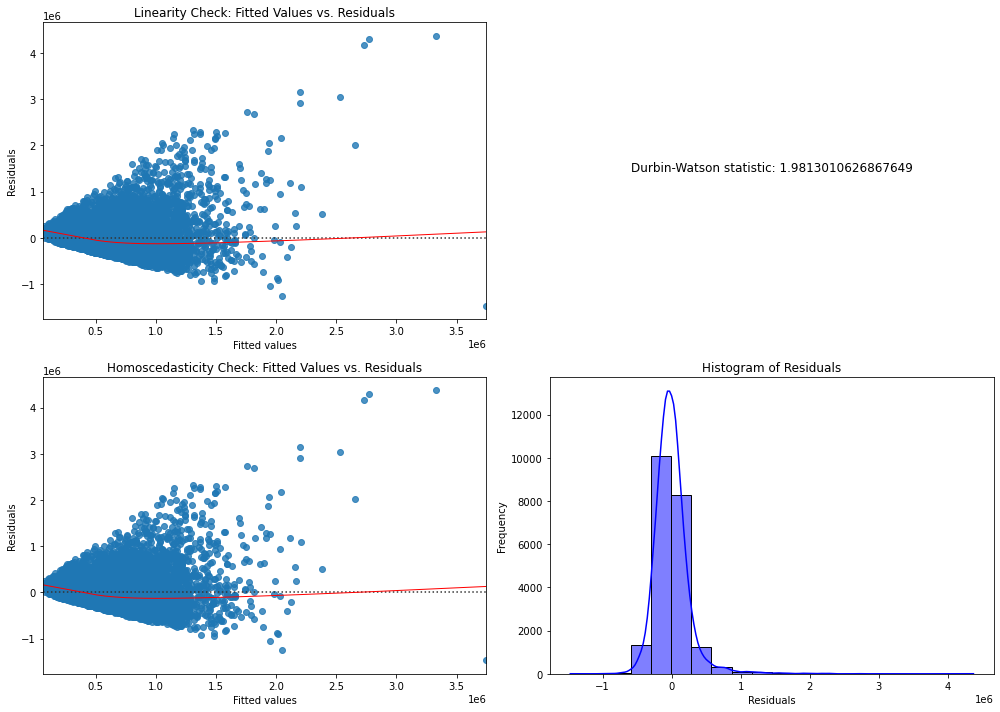

In [ ]:
# call our function to check on our simple regression model
check_regression_assumptions(simple_model_results)

From the output above we can interpret the results as:

* Durbin-Watson statistic of approximately 1.98, shows that there is no significant autocorrelation in the residuals, which is a favorable result for your regression analysis
* The linearity check plot shows a random scatter of points around the horizontal axis, which suggests that the linearity assumption is reasonable, indicating that the relationship between the independent variables and the dependent variable is approximately linear.
* In the  homoscedasticity plot we can observe a pattern of a 'funnel shape', it suggests that the homoscedasticity assumption may be violated, indicating heteroscedasticity.
* The Q-Q plot, shows the points fall close to the diagonal line, it suggests that the residuals follow a normal distribution.

#### Shortcomings of the simple linear regression

Simple linear regression assumes that the residuals are normally distributed with constant variance. However, in real-world data, the assumptions of normality and homoscedasticity may be violated, leading to biased estimates and unreliable inference

House prices are influenced by a multitude of factors beyond just square footage. Ignoring these factors in favor of a simple linear model may result in omitted variable bias and inaccurate predictions.

The r-squared value indicates that our simple regression model only explains 43.0% variation in home price and this is not extremely high

## Multilinear Regression
### Identification of categorical variables for prediction


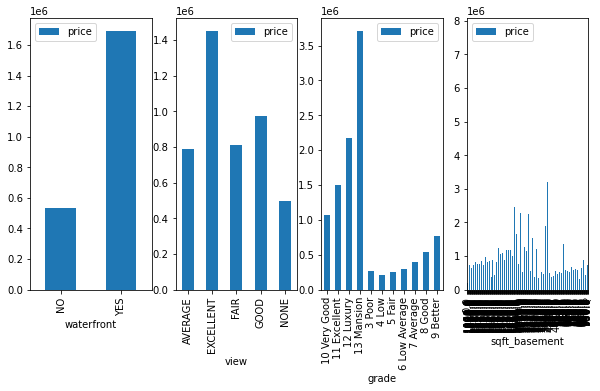

In [31]:
import matplotlib.pyplot as plt

categorical_features = house_data_clean.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(10,5))

for index, feature in enumerate(categorical_features):
   house_data_clean.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

In [37]:
cat_column= pd.DataFrame(house_data_clean[['price','waterfront','view','sqft_basement']])
cat_column


,price,waterfront,view,sqft_basement
0,221900.0,NO,NONE,0.0
1,538000.0,NO,NONE,400.0
2,180000.0,NO,NONE,0.0
3,604000.0,NO,NONE,910.0
4,510000.0,NO,NONE,0.0
...,...,...,...,...
21592,360000.0,NO,NONE,0.0
21593,400000.0,NO,NONE,0.0
21594,402101.0,NO,NONE,0.0
21595,400000.0,NO,NONE,0.0


In [39]:
# correlation of the predictor variables in relation to price
house_data_encoded = pd.get_dummies(house_data_clean)

# Calculate correlation coefficients between 'price' and other predictor variables
correlation =house_data_encoded.corr()['price'].drop('price')
correlation


id                    -0.017392
bedrooms               0.308063
bathrooms              0.525053
sqft_living            0.701587
floors                 0.257052
                         ...   
sqft_basement_960.0    0.015356
sqft_basement_970.0    0.013139
sqft_basement_980.0    0.020798
sqft_basement_990.0    0.027098
sqft_basement_?       -0.003530
Name: price, Length: 327, dtype: float64

The correlation above shows bathrooms,bedrooms and sqft_living have a positive correlation
* sqft_living: The coefficient for the "sqft_living" feature is 0.701587. This indicates a strong positive relationship between the square footage of living space in a house and its price. As the living space area increases, the price of the house tends to increase proportionally.

* bathrooms: The coefficient for the "bathrooms" feature is 0.525053. Similarly, there is a positive relationship between the number of bathrooms in a house and its price. Houses with more bathrooms tend to have higher prices